In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from PIL import ImageFilter
from collections import Counter

In [2]:
data= pd.read_csv('/Users/alysaschoenfelder/Downloads/airbnb_clean_3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   102599 non-null  int64  
 1   Name                 102349 non-null  object 
 2   Borough              102570 non-null  object 
 3   Neighbourhood        102583 non-null  object 
 4   Lat                  102591 non-null  float64
 5   Lon                  102591 non-null  float64
 6   Instant_Booking      102494 non-null  object 
 7   Cancellation_Policy  102523 non-null  object 
 8   Room_Type            102599 non-null  object 
 9   Construction_Year    102385 non-null  float64
 10  Price_Per_Night      102352 non-null  float64
 11  Total_Reviews        102416 non-null  float64
 12  Rating               102273 non-null  float64
 13  House_Rules          50468 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 11.0+ MB


In [4]:
data.head()

,id,Name,Borough,Neighbourhood,Lat,Lon,Instant_Booking,Cancellation_Policy,Room_Type,Construction_Year,Price_Per_Night,Total_Reviews,Rating,House_Rules
0,2431241,Beautiful Central Harlem sleeps 4,Manhattan,Harlem,40.80861,-73.94574,False,moderate,Entire home/apt,2014.0,1200.0,123.0,1.0,No smoking in the unit ( strict) No pets (str...
1,3877162,Bushwick Room w/ Private Entrance & Bathroom!,Brooklyn,Bushwick,40.70322,-73.92913,True,strict,Private room,2020.0,1200.0,16.0,1.0,No smoking in the apartment.
2,5117628,Sun-filled bedroom in East Village / Gramercy NYC,Manhattan,Gramercy,40.73170,-73.98272,True,strict,Private room,2009.0,1200.0,136.0,2.0,"We live on the 3rd floor of a 3-family house, ..."
3,6416638,Private room in hip & historic area,Brooklyn,Bedford-Stuyvesant,40.68346,-73.95551,False,strict,Private room,2017.0,1200.0,30.0,1.0,NaN
4,6637005,1BR GARDEN APT 25 MIN TO MANHATTAN,Brooklyn,East Flatbush,40.64569,-73.94776,False,moderate,Entire home/apt,2008.0,1200.0,29.0,4.0,#NAME?


In [6]:
average_price_by_bur = data.groupby('Borough')['Price_Per_Night'].mean()
print(average_price_by_bur)

Borough
Bronx            627.766359
Brooklyn         626.561078
Manhattan        622.436508
Queens           630.207647
Staten Island    624.490546
Name: Price_Per_Night, dtype: float64


In [7]:
average_price_by_hood = data.groupby('Neighbourhood')['Price_Per_Night'].mean()
print(average_price_by_hood)

Neighbourhood
Allerton           636.343750
Arden Heights      804.888889
Arrochar           625.764706
Arverne            652.125561
Astoria            639.035275
                      ...    
Windsor Terrace    579.784848
Woodhaven          630.518325
Woodlawn           587.137931
Woodrow            709.333333
Woodside           634.588336
Name: Price_Per_Night, Length: 224, dtype: float64


In [17]:
neighborhoods_by_bor = data.groupby('Borough')['Neighbourhood'].unique().reset_index()
print(neighborhoods_by_bor)

         Borough                                      Neighbourhood
0          Bronx  [Belmont, Hunts Point, City Island, Port Morri...
1       Brooklyn  [Bushwick, Bedford-Stuyvesant, East Flatbush, ...
2      Manhattan  [Harlem, Gramercy, Greenwich Village, Hell's K...
3         Queens  [Astoria, Flushing, Woodside, Elmhurst, Ditmar...
4  Staten Island  [Shore Acres, Tompkinsville, Arrochar, Clifton...


In [65]:
unique_neighborhoods_by_borough = neighborhoods_by_bor.groupby('Borough')['Neighbourhood'].apply(lambda x: x.explode().unique())

for borough, unique_neighborhoods in unique_neighborhoods_by_borough.items():
    print(f"{borough}:")
    print(list(unique_neighborhoods))
    print()

Bronx:
['Belmont', 'Hunts Point', 'City Island', 'Port Morris', 'Wakefield', 'Westchester Square', 'North Riverdale', 'Fordham', 'Allerton', 'Co-op City', 'Longwood', 'Concourse Village', 'Mott Haven', 'Claremont Village', 'Morrisania', 'Fieldston', 'Schuylerville', 'Throgs Neck', 'Pelham Gardens', 'Concourse', 'Norwood', 'Williamsbridge', 'Mount Hope', 'Tremont', 'East Morrisania', 'Baychester', 'Morris Heights', 'Bronxdale', 'Van Nest', 'Kingsbridge', 'University Heights', 'Unionport', 'Riverdale', 'Eastchester', 'Pelham Bay', 'Highbridge', 'Edenwald', 'Castle Hill', 'Morris Park', 'Mount Eden', 'Woodlawn', 'Parkchester', 'Soundview', 'Clason Point', 'Olinville', 'Melrose', 'West Farms', 'Spuyten Duyvil']

Brooklyn:
['Bushwick', 'Bedford-Stuyvesant', 'East Flatbush', 'Boerum Hill', 'Greenpoint', 'East New York', 'Prospect-Lefferts Gardens', 'Williamsburg', 'Midwood', 'Crown Heights', 'Park Slope', 'Flatbush', 'Prospect Heights', 'Brooklyn Heights', 'Kensington', 'Bensonhurst', 'Canar

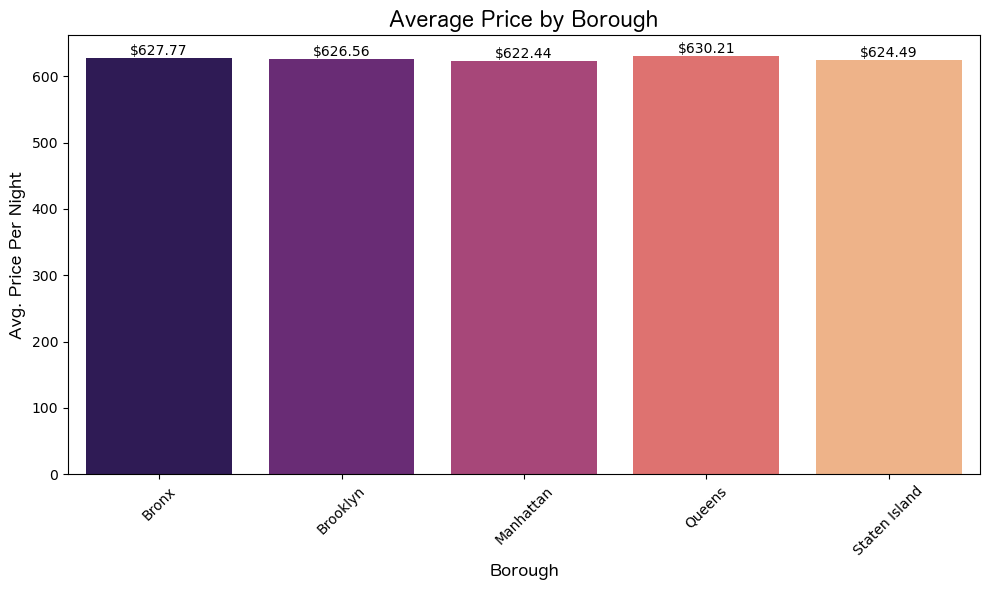

In [35]:
average_price_by_group = data.groupby('Borough')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Borough',
    y='Price_Per_Night',
    data=average_price_by_group,
    palette='magma',
)

plt.title("Average Price by Borough", fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Borough", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')


for index, row in average_price_by_group.iterrows():
    plt.text(index, row['Price_Per_Night'], f"${row['Price_Per_Night']:.2f}", ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

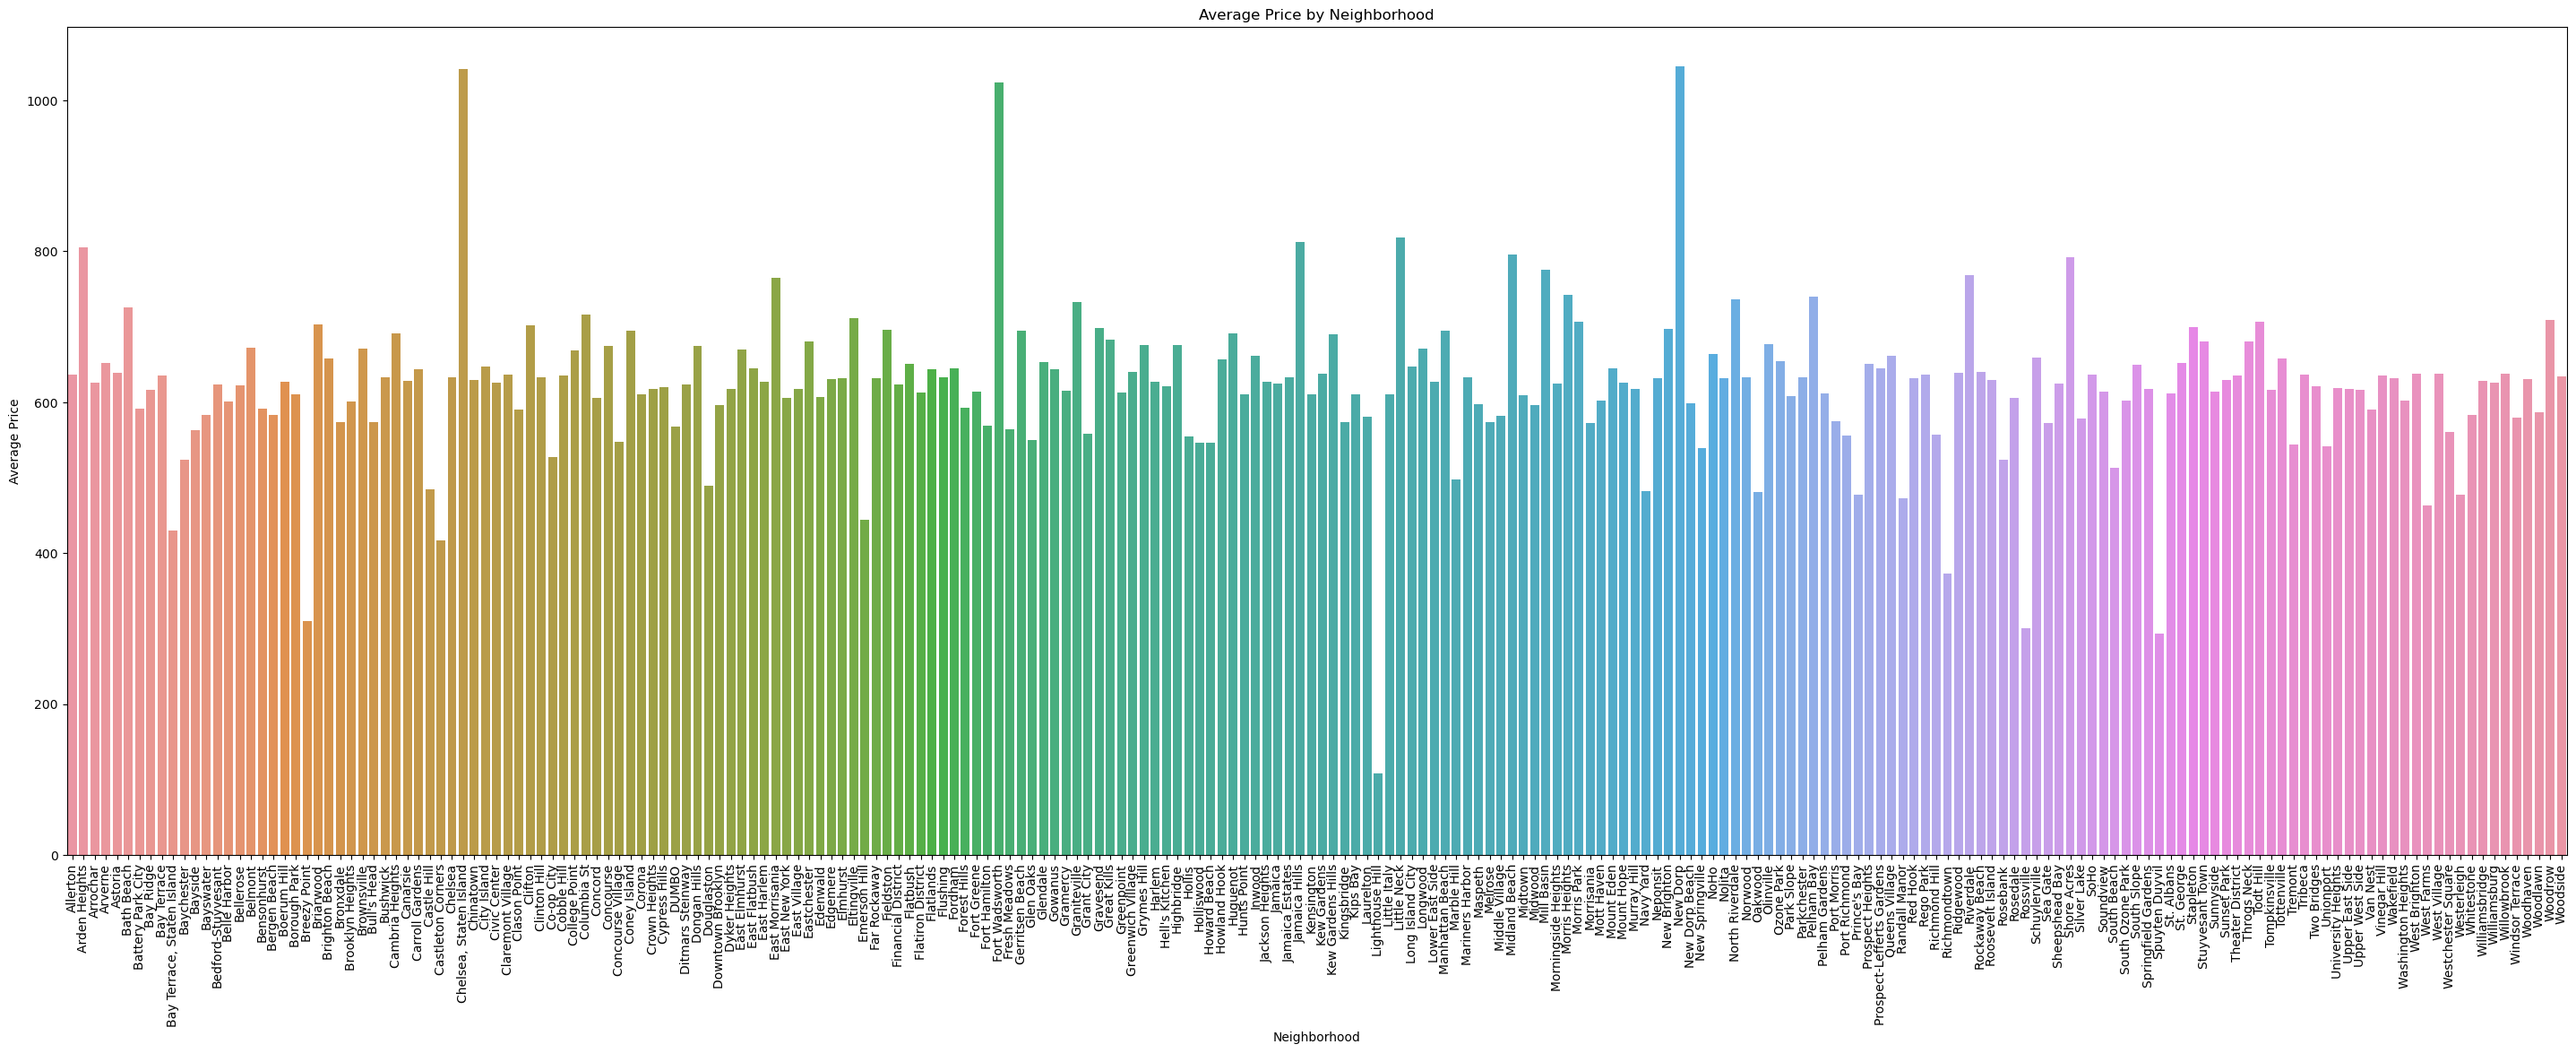

In [38]:
plt.figure(figsize=(36, 12))
sns.barplot(x=average_price_by_hood.index, y=average_price_by_hood.values)
plt.title("Average Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=90)  
plt.show()

In [15]:
average_price_by_hood = data.groupby('Neighbourhood')['Price_Per_Night'].mean()

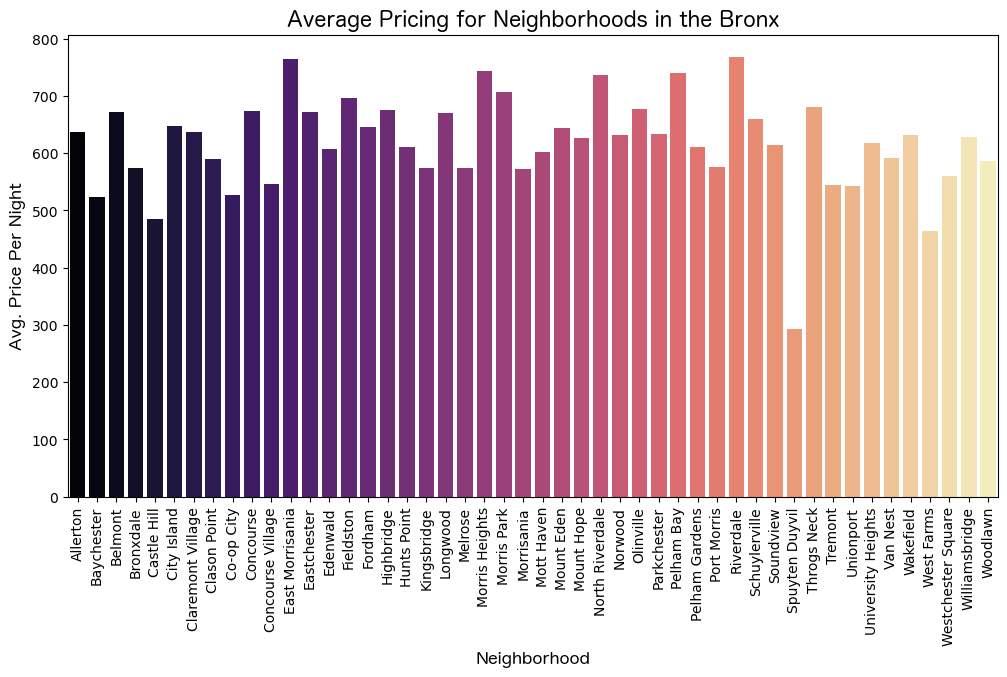

In [31]:
bronx_data = data[data['Borough'] == 'Bronx']

average_price_by_neighborhood = bronx_data.groupby('Neighbourhood')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood', y='Price_Per_Night', data=average_price_by_neighborhood, palette='magma')
plt.title("Average Pricing for Neighborhoods in the Bronx",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Neighborhood",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.xticks(rotation=90)
plt.show()

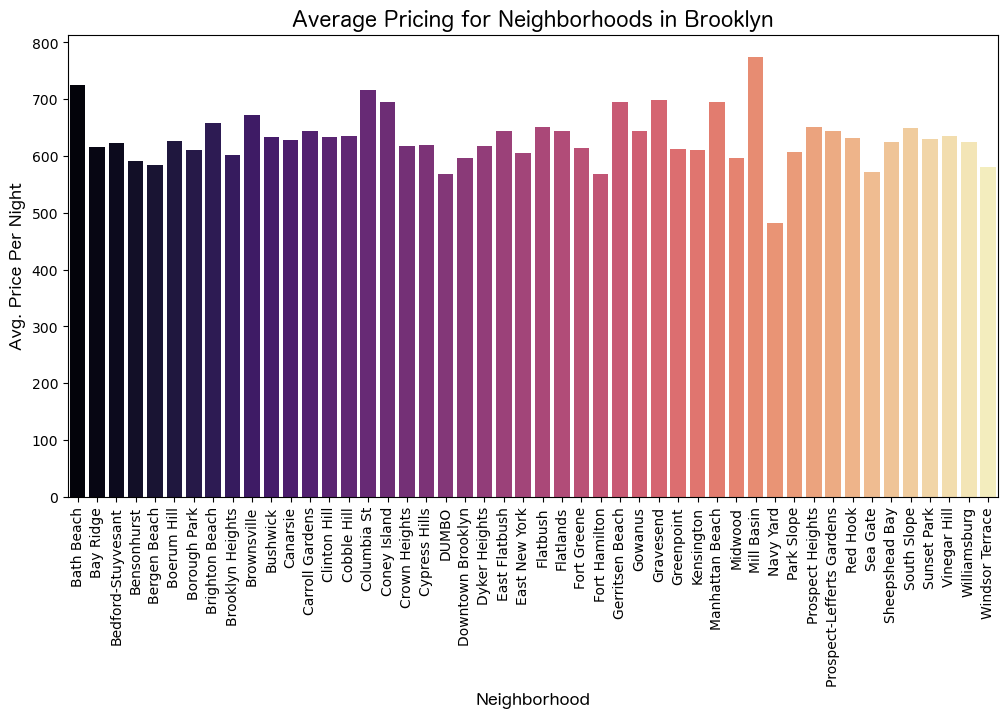

In [30]:
brooklyn_data = data[data['Borough'] == 'Brooklyn']


average_price_by_neighborhood = brooklyn_data.groupby('Neighbourhood')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood', y='Price_Per_Night', data=average_price_by_neighborhood, palette='magma')
plt.title("Average Pricing for Neighborhoods in Brooklyn",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Neighborhood",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.xticks(rotation=90)
plt.show()

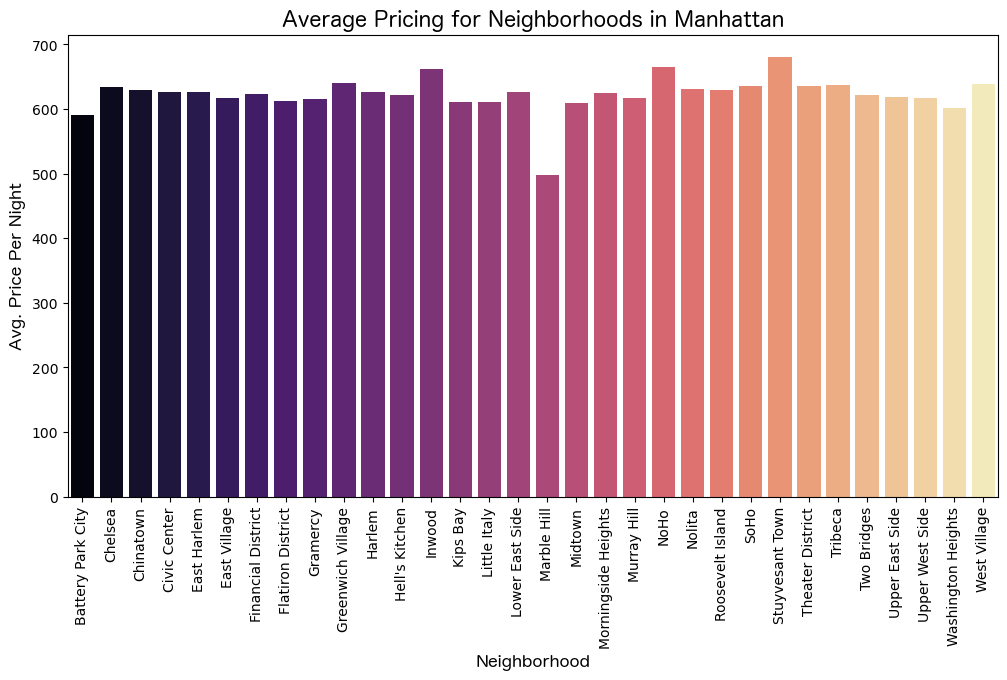

In [32]:
manhattan_data = data[data['Borough'] == 'Manhattan']

average_price_by_neighborhood = manhattan_data.groupby('Neighbourhood')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood', y='Price_Per_Night', data=average_price_by_neighborhood, palette='magma')
plt.title("Average Pricing for Neighborhoods in Manhattan",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Neighborhood",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.xticks(rotation=90)
plt.show()

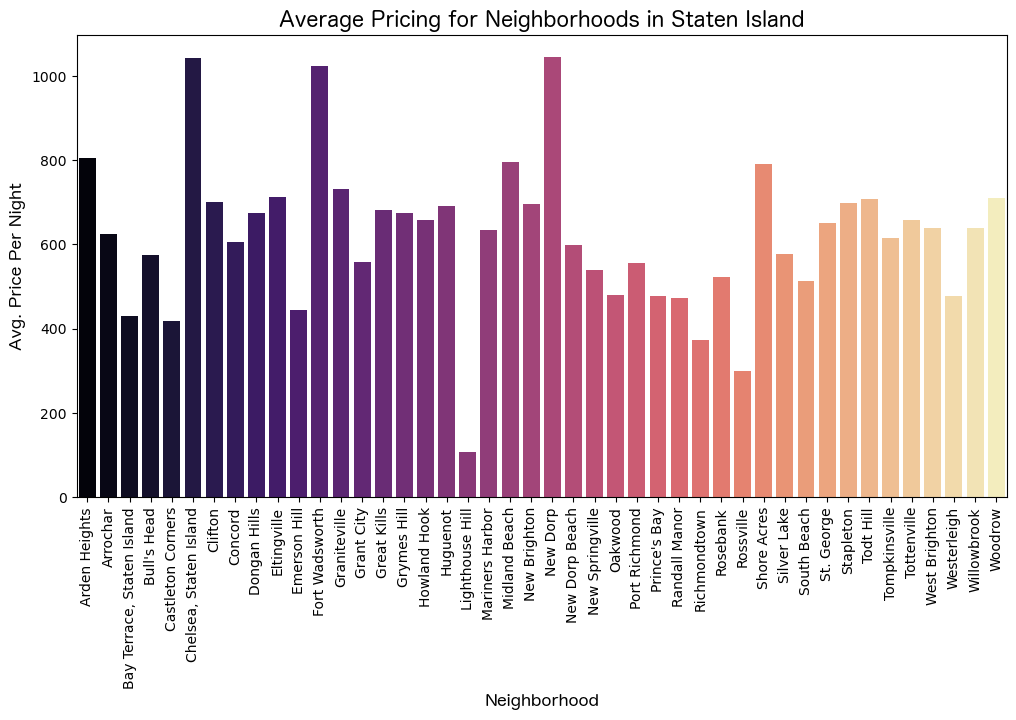

In [37]:
staten_island_data = data[data['Borough'] == 'Staten Island']

average_price_by_neighborhood = staten_island_data.groupby('Neighbourhood')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood', y='Price_Per_Night', data=average_price_by_neighborhood, palette='magma')
plt.title("Average Pricing for Neighborhoods in Staten Island",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Neighborhood",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.xticks(rotation=90)
plt.show()

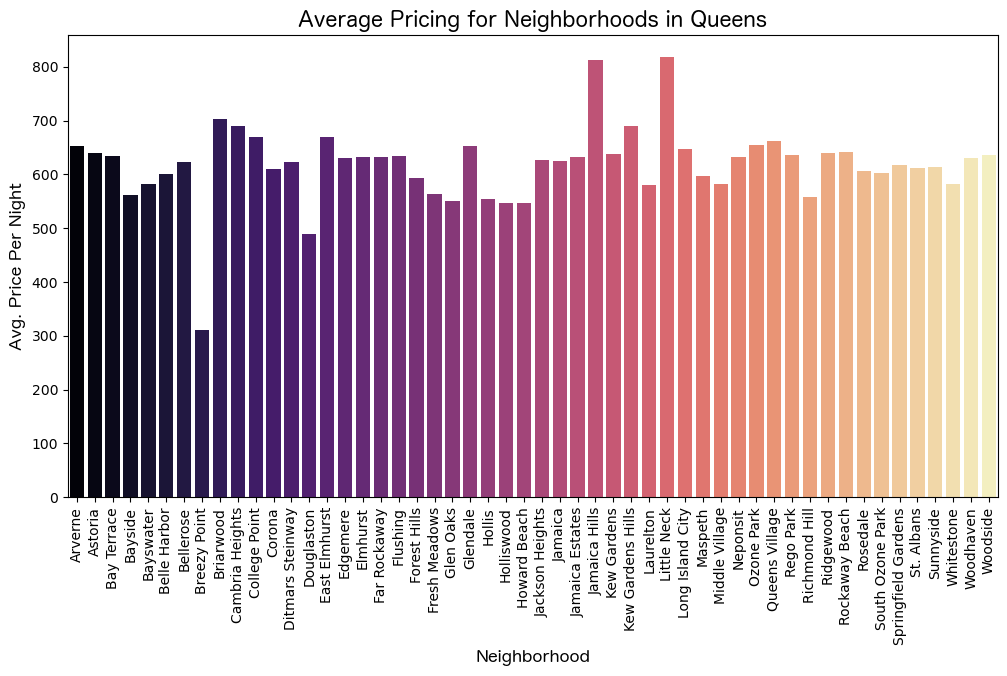

In [41]:
queens_data = data[data['Borough'] == 'Queens']

average_price_by_neighborhood = queens_data.groupby('Neighbourhood')['Price_Per_Night'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood', y='Price_Per_Night', data=average_price_by_neighborhood, palette='magma')
plt.title("Average Pricing for Neighborhoods in Queens",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Neighborhood",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Avg. Price Per Night", fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.xticks(rotation=90)
plt.show()

In [52]:
N = 10 
cheap = data.groupby('Neighbourhood')['Price_Per_Night'].mean().nsmallest(N).reset_index()

print( Ten, "Cheapest Neighborhoods:")
print(cheap)

10 Cheapest Neighborhoods:
                Neighbourhood  Price_Per_Night
0             Lighthouse Hill       107.666667
1              Spuyten Duyvil       293.444444
2                   Rossville       300.666667
3                Breezy Point       309.888889
4                Richmondtown       373.400000
5           Castleton Corners       417.230769
6  Bay Terrace, Staten Island       429.500000
7                Emerson Hill       443.800000
8                  West Farms       463.166667
9               Randall Manor       472.400000


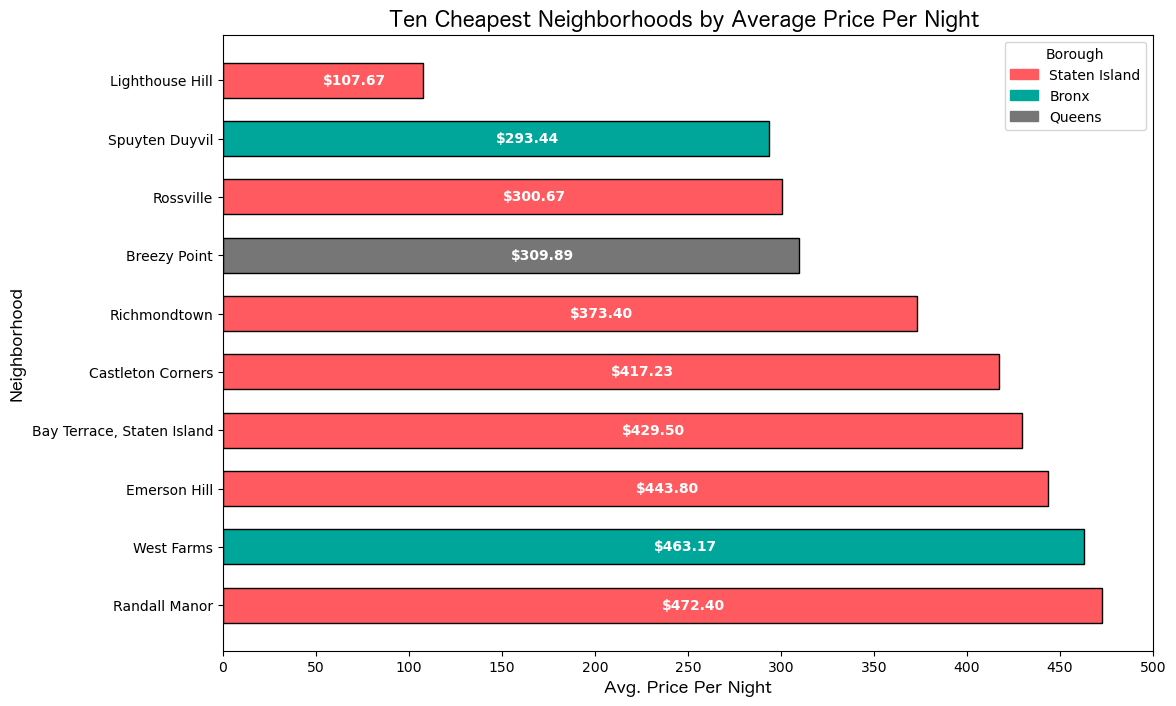

In [84]:
cheap = pd.DataFrame({
    'Neighbourhood': ['Lighthouse Hill', 'Spuyten Duyvil', 'Rossville', 'Breezy Point', 'Richmondtown',
                      'Castleton Corners', 'Bay Terrace, Staten Island', 'Emerson Hill', 'West Farms', 'Randall Manor'],
    'Price_Per_Night': [107.67, 293.44, 300.67, 309.89, 373.40, 417.23, 429.50, 443.80, 463.17, 472.40],
    'Borough': ['Staten Island', 'Bronx', 'Staten Island', 'Queens', 'Staten Island',
                             'Staten Island', 'Staten Island', 'Staten Island', 'Bronx', 'Staten Island']
})


borough_colors = {
    'Staten Island': '#FF5A5F',
    'Bronx': '#00A699',
    'Queens': '#767676'
}


plt.figure(figsize=(12, 8))
bars = plt.barh(cheap['Neighbourhood'], cheap['Price_Per_Night'], edgecolor='black', height=0.6,
                color=[borough_colors[borough] for borough in cheap['Borough']])

plt.xlabel('Average Price Per Night')
plt.title('Ten Cheapest Neighborhoods')

for i, bar in enumerate(bars):
    text_x = bar.get_width() / 2  # Centered horizontally
    text_y = bar.get_y() + bar.get_height() / 2
    plt.text(text_x, text_y, f'${cheap.iloc[i]["Price_Per_Night"]:.2f}', va='center', color='white', fontsize=10, weight='bold')


plt.xticks(range(0, int(max(cheap['Price_Per_Night'])) + 50, 50))
plt.gca().invert_yaxis()


legend_rectangles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in borough_colors.values()]
legend_labels = list(borough_colors.keys())
plt.legend(legend_rectangles, legend_labels, title='Borough', loc='upper right')
plt.title("Ten Cheapest Neighborhoods by Average Price Per Night ",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Avg. Price Per Night",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Neighborhood", fontsize=12, fontname='Hiragino Maru Gothic Pro')


plt.show()


In [78]:
N = 10 
expensive = data.groupby('Neighbourhood')['Price_Per_Night'].mean().nlargest(N).reset_index()

print( Ten, "Most Expensive Neighborhoods:")
print(expensive)

10 Most Expensive Neighborhoods:
            Neighbourhood  Price_Per_Night
0                New Dorp      1045.000000
1  Chelsea, Staten Island      1042.000000
2          Fort Wadsworth      1024.000000
3             Little Neck       817.750000
4           Jamaica Hills       812.904762
5           Arden Heights       804.888889
6           Midland Beach       796.176471
7             Shore Acres       792.260870
8              Mill Basin       775.142857
9               Riverdale       768.736842


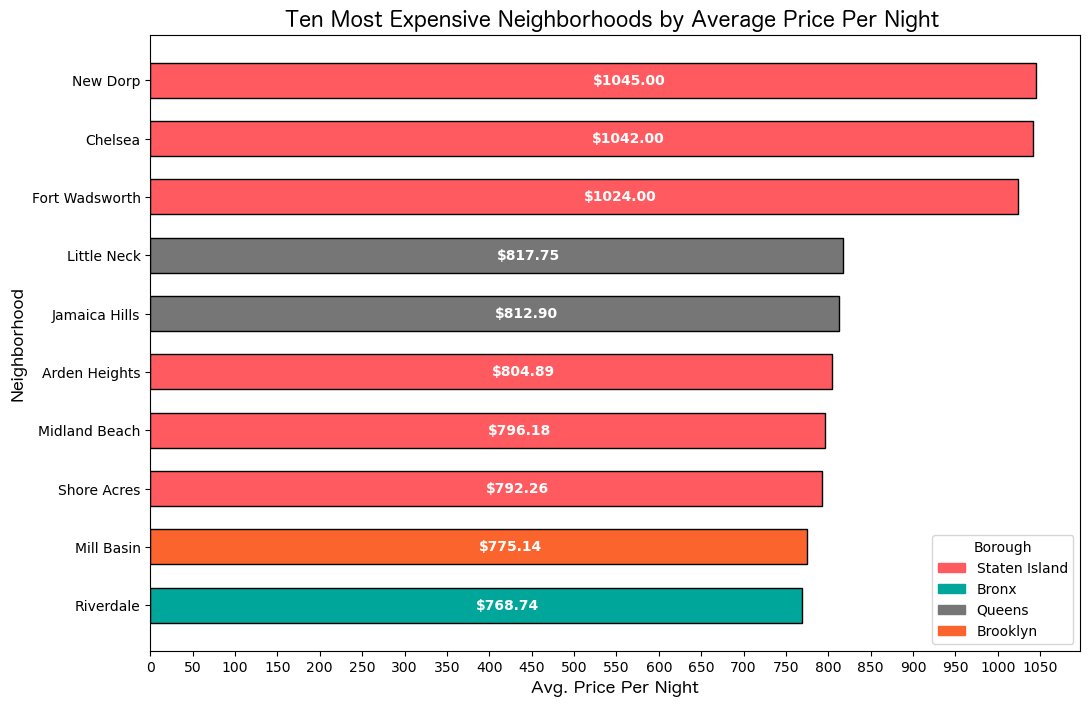

In [83]:
expensive = pd.DataFrame({
    'Neighbourhood': ['New Dorp', 'Chelsea', 'Fort Wadsworth', 'Little Neck', 'Jamaica Hills',
                      'Arden Heights', 'Midland Beach', 'Shore Acres', 'Mill Basin', 'Riverdale'],
    'Price_Per_Night': [1045.00, 1042.00, 1024.00, 817.75, 812.90, 804.89, 796.18, 792.26, 775.14, 768.74],
    'Borough': ['Staten Island', 'Staten Island', 'Staten Island', 'Queens', 'Queens',
                             'Staten Island', 'Staten Island', 'Staten Island', 'Brooklyn', 'Bronx']
})


borough_colors = {
   'Staten Island': '#FF5A5F',
    'Bronx': '#00A699',
    'Queens': '#767676',
    'Brooklyn': '#FC642D', 
}


plt.figure(figsize=(12, 8))
bars = plt.barh(expensive['Neighbourhood'], expensive['Price_Per_Night'], edgecolor='black', height=0.6,
                color=[borough_colors[borough] for borough in expensive['Borough']])

plt.xlabel('Average Price Per Night')
plt.title('Ten Most Expensive Neighborhoods')

for i, bar in enumerate(bars):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'${cheap.iloc[i]["Price_Per_Night"]:.2f}',
              va='center', color='white', fontsize=10, weight='bold')
    


plt.xticks(range(0, int(max(expensive['Price_Per_Night'])) + 50, 50))
plt.gca().invert_yaxis()


legend_rectangles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in borough_colors.values()]
legend_labels = list(borough_colors.keys())
plt.legend(legend_rectangles, legend_labels, title='Borough', loc='lower right')
plt.title("Ten Most Expensive Neighborhoods by Average Price Per Night ",  fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel("Avg. Price Per Night",  fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel("Neighborhood", fontsize=12, fontname='Hiragino Maru Gothic Pro')


plt.show()


In [85]:
hood_counts = data['Neighbourhood'].value_counts()
print(hood_counts)

Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Lighthouse Hill              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: Neighbourhood, Length: 224, dtype: int64


In [87]:
bor_counts=data['Borough'].value_counts()
print(bor_counts)

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: Borough, dtype: int64


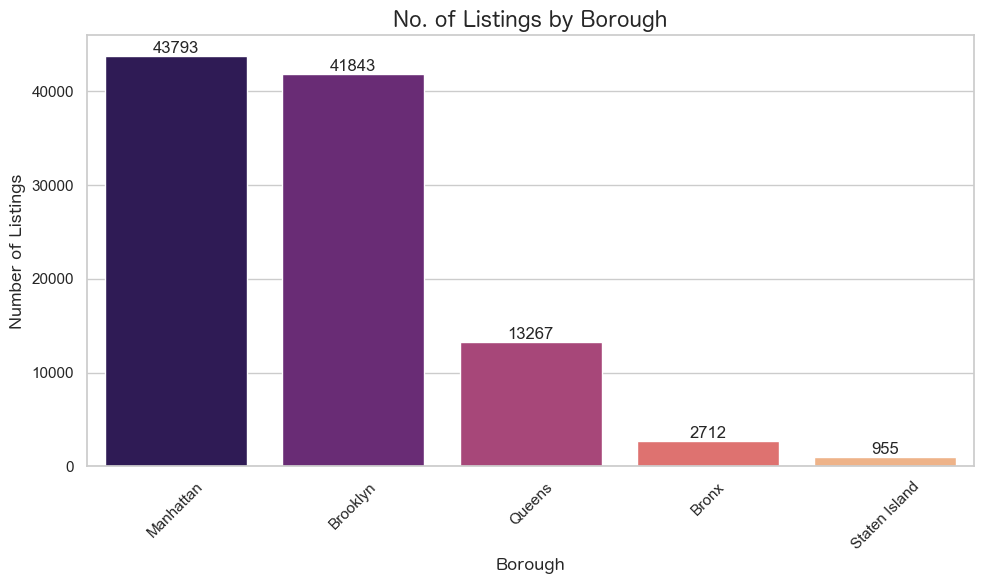

In [93]:
listings = pd.DataFrame({
    'Borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Counts': [43793, 41843, 13267, 2712, 955]
})

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x="Borough", y="Counts", data=listings, palette='magma')
plt.title('No. of Listings by Borough', fontsize=15, fontname='Hiragino Maru Gothic Pro')
plt.xlabel('Borough', fontsize=12, fontname='Hiragino Maru Gothic Pro')
plt.ylabel('Number of Listings', fontsize=12, fontname='Hiragino Maru Gothic Pro')

for index, row in listings.iterrows():
    plt.text(index, row['Counts'], str(row['Counts']), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
listings = pd.DataFrame({
    'Borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Counts': [43793, 41843, 13267, 2712, 955]
})

sns.set_palette("Set2")


plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(listings['Counts'], autopct='%1.1f%%', startangle=140, textprops={'color': 'black'}, explode=(0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Percentage of Listings by Borough', fontsize=15, fontname='Hiragino Maru Gothic Pro')

for text in autopct:
    text.set_fontsize(12)
    text.set_fontweight('bold')


plt.legend(wedges, listings['Borough'], title='Borough', loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

NameError: name 'pd' is not defined